<div style="text-align: center; font-size: 32px;">
    <b>Drug Side Effect EDA </b>
</div>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import textwrap
import warnings as wr
wr.filterwarnings("ignore")

In [112]:
df=pd.read_excel('side_effect_data.xlsx') # excel dosyasinin okunup dataframe icine aktarilmasi.

In [113]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [114]:
df.info() #DataFrame sütunlarının içerdiği veri sayısı ve veri türleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [115]:
df.columns #dataframe'deki kolonlarin isimleri

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik_Hastaliklarim',
       'Baba_Kronik_Hastaliklari', 'Anne_Kronik_Hastaliklari',
       'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek_Kardes_Kronik_Hastaliklari',
       'Kan_Grubu', 'Kilo', 'Boy'],
      dtype='object')

In [116]:
df.dtypes # dataframe'deki kolonlarin veri tipleri

Kullanici_id                                 int64
Cinsiyet                                    object
Dogum_Tarihi                        datetime64[ns]
Uyruk                                       object
Il                                          object
Ilac_Adi                                    object
Ilac_Baslangic_Tarihi               datetime64[ns]
Ilac_Bitis_Tarihi                   datetime64[ns]
Yan_Etki                                    object
Yan_Etki_Bildirim_Tarihi            datetime64[ns]
Alerjilerim                                 object
Kronik_Hastaliklarim                        object
Baba_Kronik_Hastaliklari                    object
Anne_Kronik_Hastaliklari                    object
Kiz_Kardes_Kronik_Hastaliklari              object
Erkek_Kardes_Kronik_Hastaliklari            object
Kan_Grubu                                   object
Kilo                                       float64
Boy                                        float64
dtype: object

In [117]:
df.describe() # dataframe'deki sayisal deger iceren kolonlarin bazi istatiksel degerleri

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


In [118]:
df.describe(include =['O'])

,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu
count,1579,2357,2130,2357,2357,1873,1965,2201,2140,2260,2236,2010
unique,2,1,13,151,22,28,80,92,84,85,90,8
top,Female,Turkiye,Adana,chlordiazepoxide-amitriptyline,Agizda Farkli Bir Tat,Domates,"Alzheimer, Diger","Alzheimer, Diyabet","Alzheimer, Astim",,,AB RH-
freq,872,2357,220,29,229,118,61,64,110,168,136,421


In [119]:
df.isnull().sum() # dataframe'deki kolonlarin bos deger sayilari

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik_Hastaliklarim                392
Baba_Kronik_Hastaliklari            156
Anne_Kronik_Hastaliklari            217
Kiz_Kardes_Kronik_Hastaliklari       97
Erkek_Kardes_Kronik_Hastaliklari    121
Kan_Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [120]:
df['Age']=(pd.Timestamp.today()-df['Dogum_Tarihi']).dt.days/365.25

In [121]:
# "Kronik Hastaliklarim"
df['Kronik_Hastaliklarim'] = df['Kronik_Hastaliklarim'].str.split(',')
df_exploded = df.explode('Kronik_Hastaliklarim')

# Benzersiz hastalıkl sayısını öğrenme;
unique_count = len(df_exploded['Kronik_Hastaliklarim'].unique())
print(f"Benzersiz hastalık sayısı: {unique_count}")

Benzersiz hastalık sayısı: 22


In [122]:
DepGroup = df_exploded.groupby("Kronik_Hastaliklarim")
print(DepGroup.size())
     

Kronik_Hastaliklarim
 Alzheimer            138
 Astim                172
 Diger                248
 Diyabet              203
 Guatr                168
 Hipertansiyon        277
 KOAH                 130
 Kalp Hastaliklari    163
 Kan Hastaliklari     135
 Kanser                89
 Kemik Erimesi         56
Alzheimer             205
Astim                 124
Diyabet               193
Guatr                 137
Hipertansiyon         184
KOAH                  291
Kalp Hastaliklari     164
Kan Hastaliklari      248
Kanser                184
Kemik Erimesi         235
dtype: int64


In [123]:

df_exploded['Kronik_Hastaliklarim'] = df_exploded['Kronik_Hastaliklarim'].str.strip()
df_exploded['Ilac_Adi'] = df_exploded['Ilac_Adi'].str.strip()

# Tekrar gruplama işlemi
DepGroup = df_exploded.groupby("Kronik_Hastaliklarim")
print(DepGroup.size())  #her gruptaki eleman doğru sayısıni artık görebiliriz

# Her bir grubun "Yaş" sütununun ortalaması için;
print("\n'Her bir grubun yaş sütununun ortalaması'\n")
yas_ortalama = DepGroup['Age'].mean()
print(yas_ortalama)

Kronik_Hastaliklarim
Alzheimer            343
Astim                296
Diger                248
Diyabet              396
Guatr                305
Hipertansiyon        461
KOAH                 421
Kalp Hastaliklari    327
Kan Hastaliklari     383
Kanser               273
Kemik Erimesi        291
dtype: int64

'Her bir grubun yaş sütununun ortalaması'

Kronik_Hastaliklarim
Alzheimer            54.094791
Astim                44.077483
Diger                51.171359
Diyabet              49.704692
Guatr                42.569630
Hipertansiyon        51.228377
KOAH                 52.919645
Kalp Hastaliklari    50.491327
Kan Hastaliklari     47.337583
Kanser               51.518810
Kemik Erimesi        49.550527
Name: Age, dtype: float64


In [124]:
import matplotlib.pyplot as plt #verileri gorsellestirmek icin gerekli kutuphane

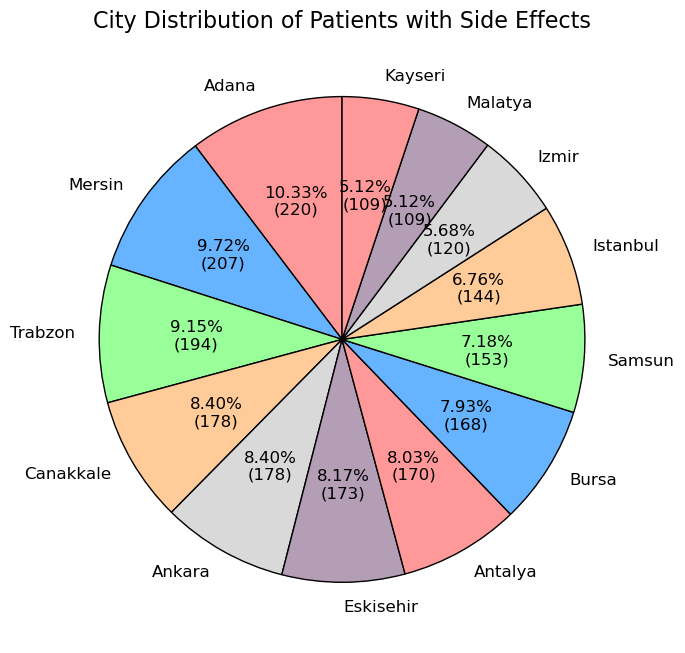

In [125]:
city_distribution = df['Il'].value_counts()  # Yan etkiye uğramış hastaların yaşadıkları illerin dağılımı

plt.figure(figsize=(7,7))  # Grafik boyutunu büyüttüm
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#D9D9D9', '#B39EB5']  # Özel renkler

# Pie grafiği
city_distribution.plot(
    kind="pie", 
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(city_distribution)/100)})',  # Yüzde ve sayı formatı
    colors=colors,  # Özel renkler kullanıldı
    legend=False,
    startangle=90,  # Başlangıç açısı eklendi
    wedgeprops={'edgecolor': 'black'},  # Kenar renkleri eklendi
    textprops={'fontsize': 12}  # Yazı boyutu ayarlandı
)

plt.title('City Distribution of Patients with Side Effects', fontsize=16)  # Başlık büyüklüğü
plt.tight_layout()
plt.ylabel("")
plt.show()


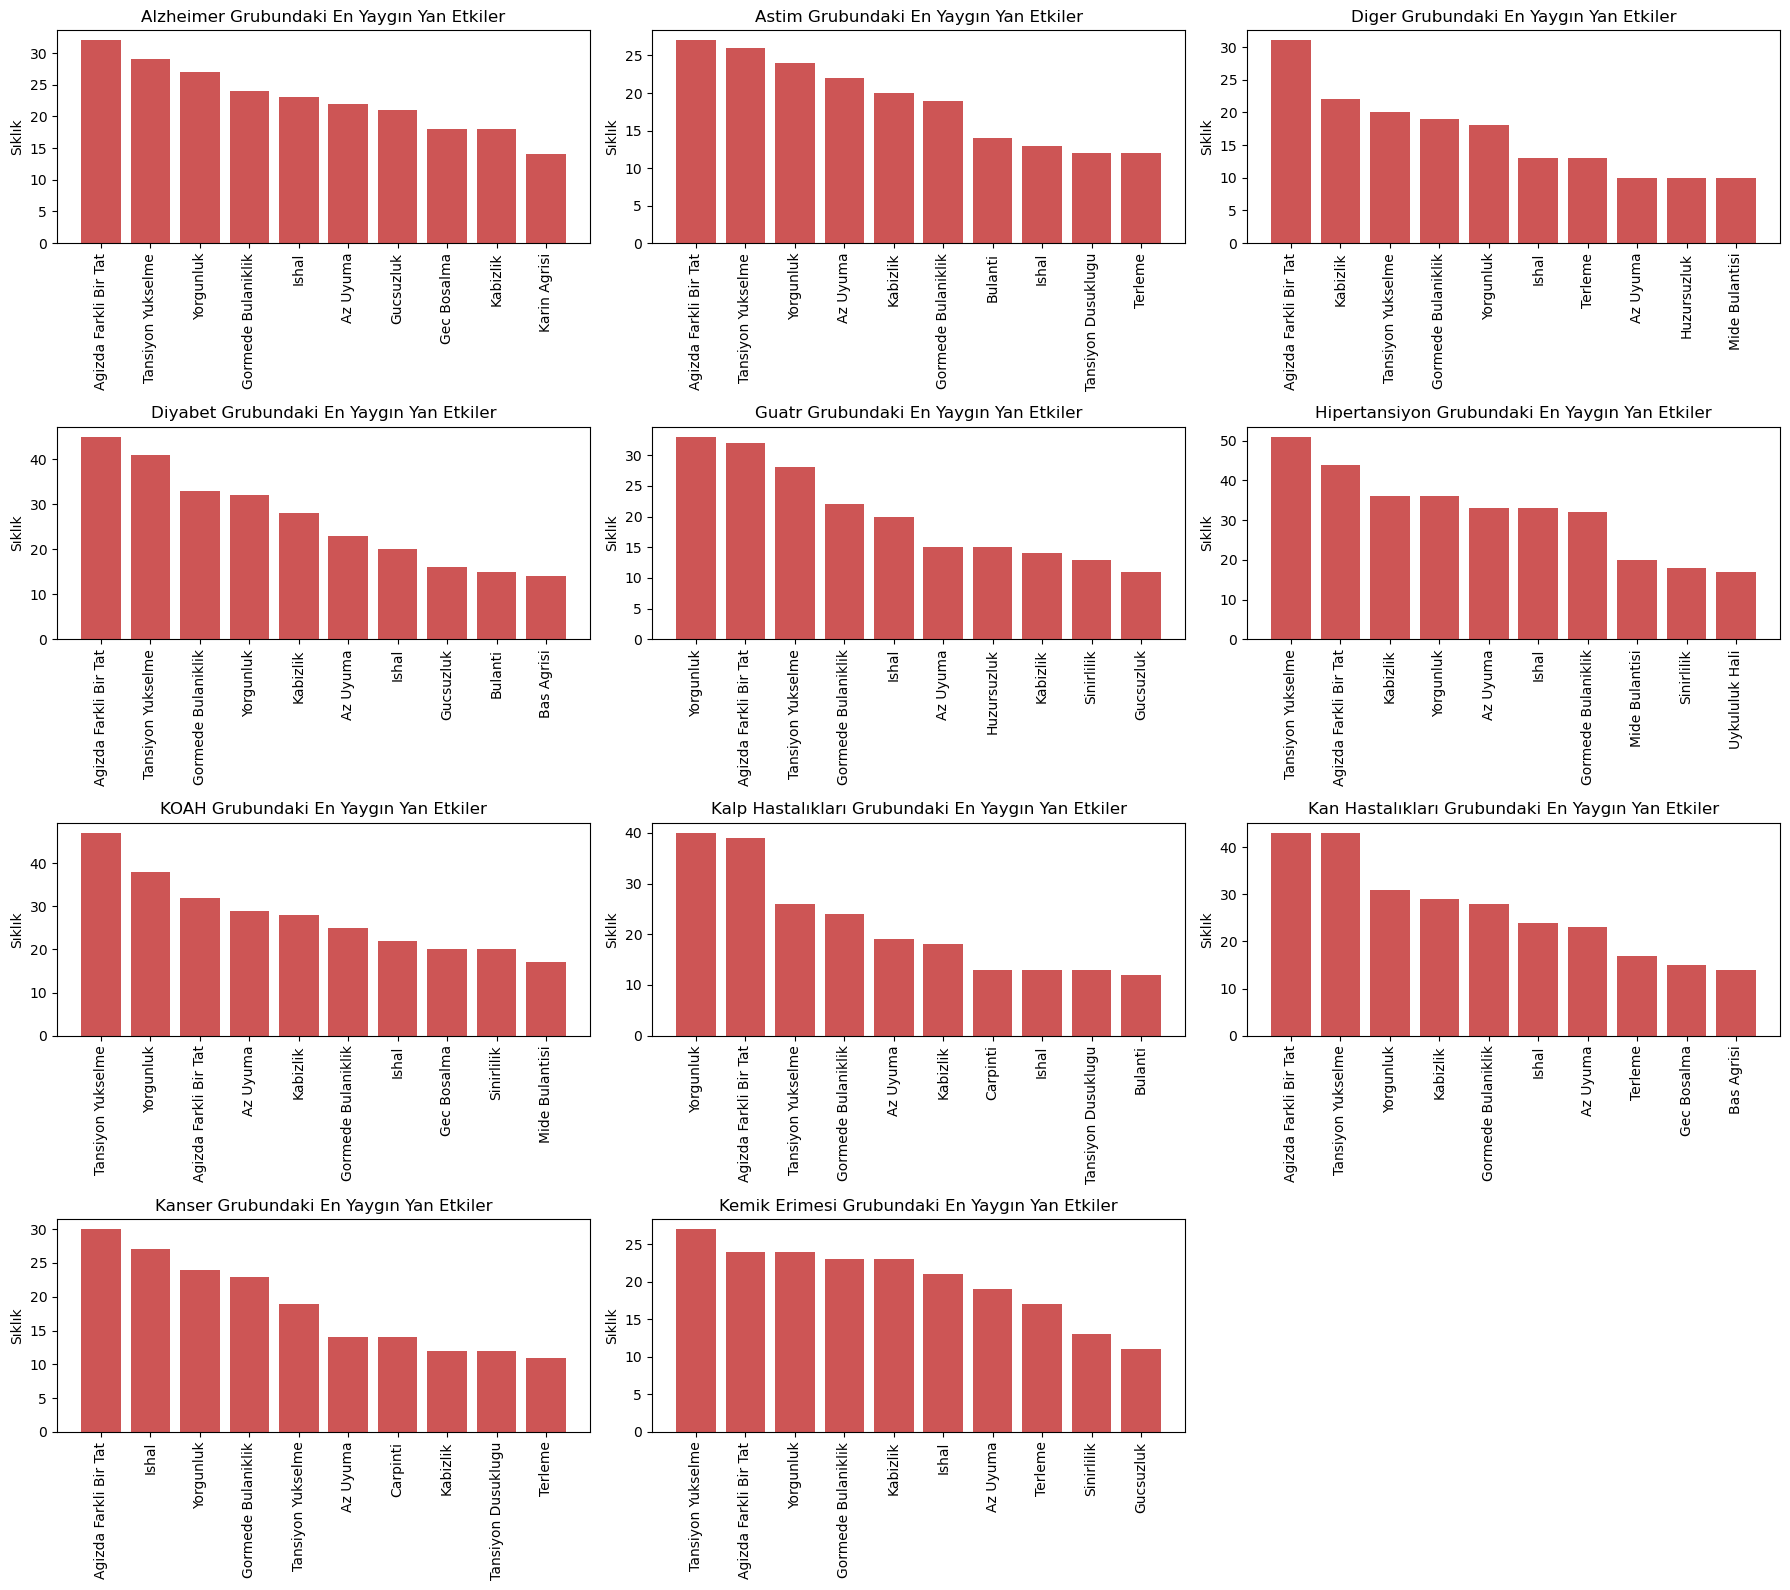

In [126]:

Alzheimer=DepGroup.get_group("Alzheimer")
Astim=DepGroup.get_group("Astim")
Diger=DepGroup.get_group("Diger")
Diyabet=DepGroup.get_group("Diyabet")
Guatr=DepGroup.get_group("Guatr")
Hipertansiyon=DepGroup.get_group("Hipertansiyon")
KOAH=DepGroup.get_group("KOAH")
Kalp_Hastaliklari=DepGroup.get_group("Kalp Hastaliklari")
Kan_Hastaliklari=DepGroup.get_group("Kan Hastaliklari")
Kanser=DepGroup.get_group("Kanser")
Kemik_Erimesi=DepGroup.get_group("Kemik Erimesi")

groups = [Alzheimer, Astim, Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Kalp_Hastaliklari, Kan_Hastaliklari, Kanser, Kemik_Erimesi]
group_names = ['Alzheimer', 'Astim', 'Diger', 'Diyabet', 'Guatr', 'Hipertansiyon', 'KOAH', 'Kalp Hastalıkları', 'Kan Hastalıkları', 'Kanser', 'Kemik Erimesi']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_yan_etki_count = group.groupby(['Ilac_Adi', 'Yan_Etki']).size().reset_index(name='Sıklık')


    top_yan_etkiler = ilac_yan_etki_count.groupby('Yan_Etki')['Sıklık'].sum().nlargest(10)


    axes[i].bar(top_yan_etkiler.index, top_yan_etkiler.values, color='#cd5555')
    axes[i].set_title(f'{name} Grubundaki En Yaygın Yan Etkiler')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

     

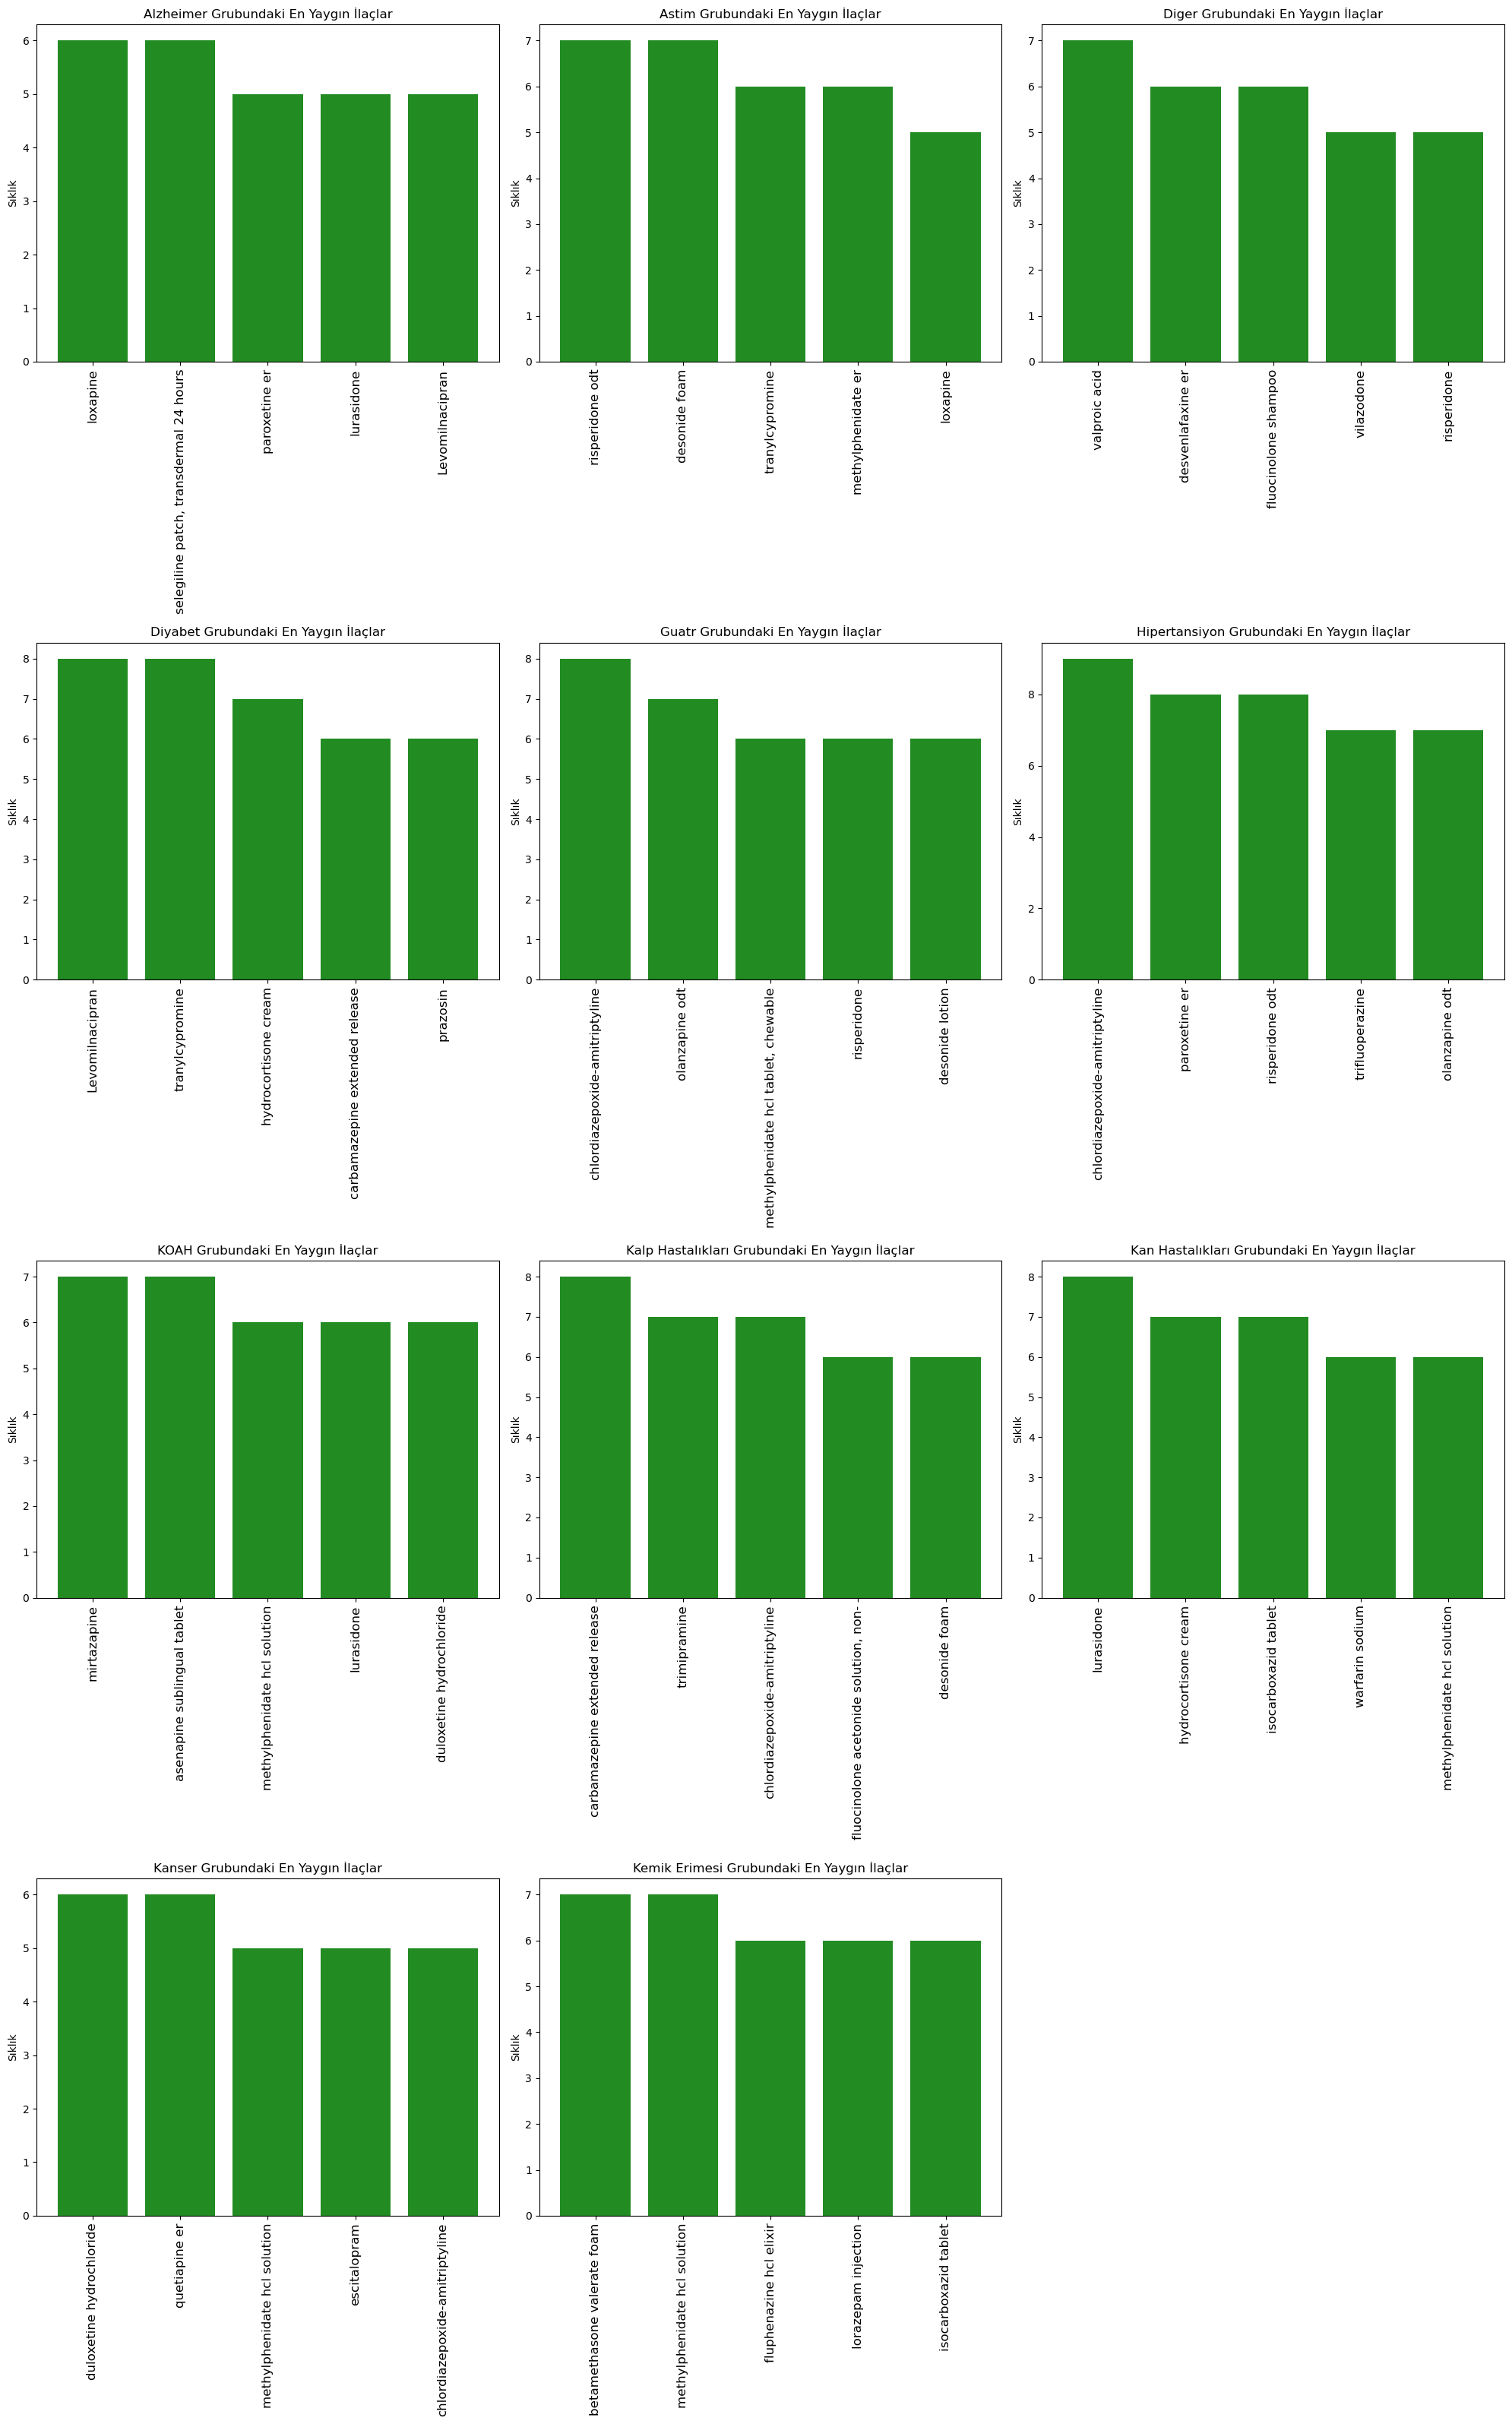

In [127]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 32))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_count = group['Ilac_Adi'].value_counts().nlargest(5)

    axes[i].bar(ilac_count.index, ilac_count.values, color='#228b22')  # Tek renk eklendi
    axes[i].set_title(f'{name} Grubundaki En Yaygın İlaçlar')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90, labelsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()


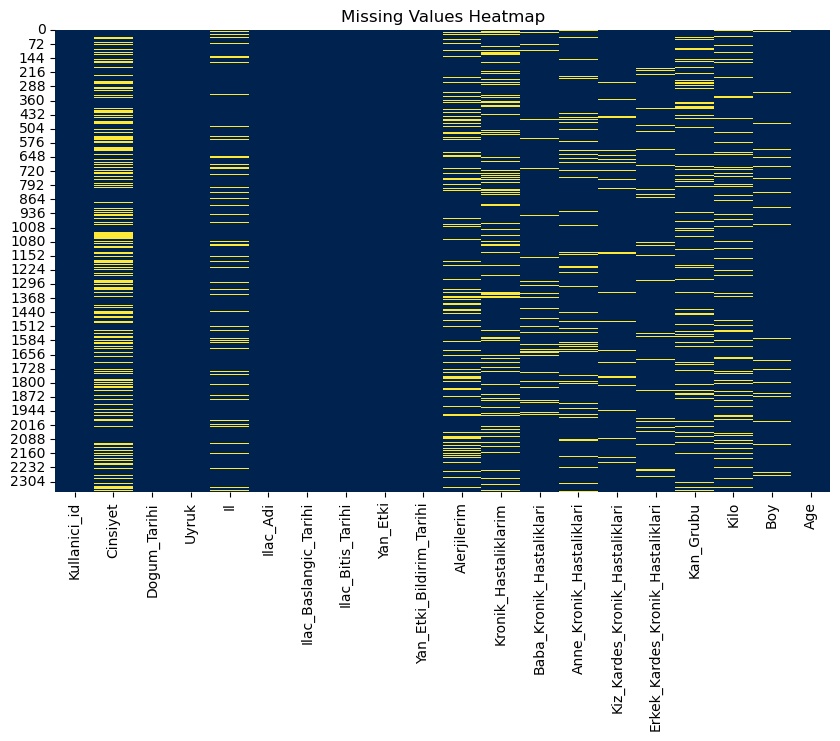

In [128]:
#Eksik degerlerin isi haritasinda gosterilmesi
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Values ​​Heatmap')
plt.show()

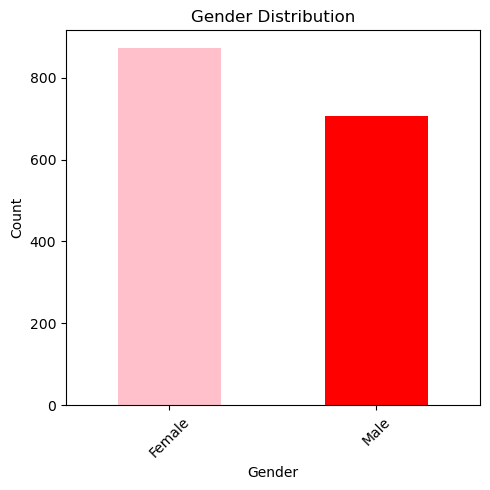

In [129]:
gender_distribution=df['Cinsiyet'].value_counts() # yan etkiye ugramis hastalarin cinsiyet dagilimi

plt.figure(figsize=(5,5)) #width and height respectively.
gender_distribution.plot(kind='bar',color=['pink','red'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

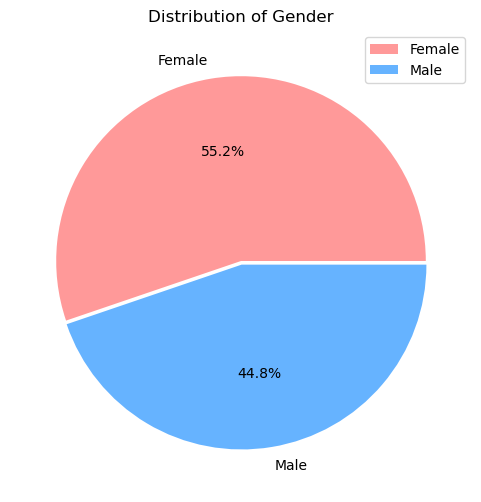

In [130]:
count = df["Cinsiyet"].value_counts()  # Cinsiyet dağılımı
labels = count.index  # Value_counts'tan gelen değerlere göre etiketler oluşturulur

plt.figure(figsize=(6, 6))
plt.pie(count, labels=labels, autopct="%.1f%%", explode=(0, 0.02), colors=colors)
colors = ['#FF9999', '#66B3FF']
plt.legend(labels=labels)
plt.title("Distribution of Gender")
plt.show()

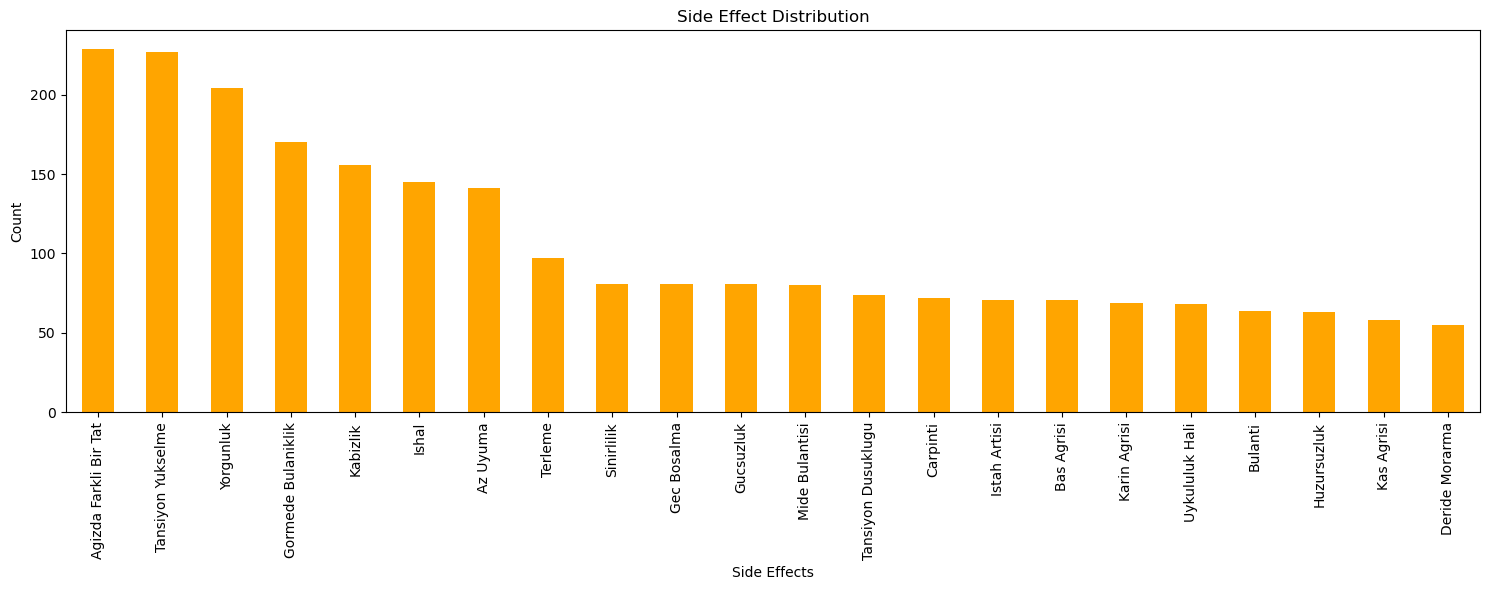

In [131]:
side_effect_distribution=df['Yan_Etki'].value_counts() # yan etki dagilimi

plt.figure(figsize=(15,6)) #width and height respectively.
side_effect_distribution.plot(kind='bar', color='orange')

plt.title('Side Effect Distribution')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

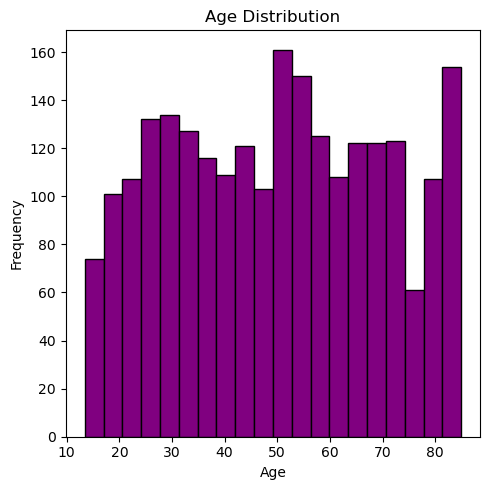

In [132]:
# Yan etki yaşayan kişilerin yaşlara göre dağılımı

df['Age']=(pd.Timestamp.today()-df['Dogum_Tarihi']).dt.days/365.25

plt.figure(figsize=(5,5))
df['Age'].plot(kind="hist",bins=20,color='purple',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

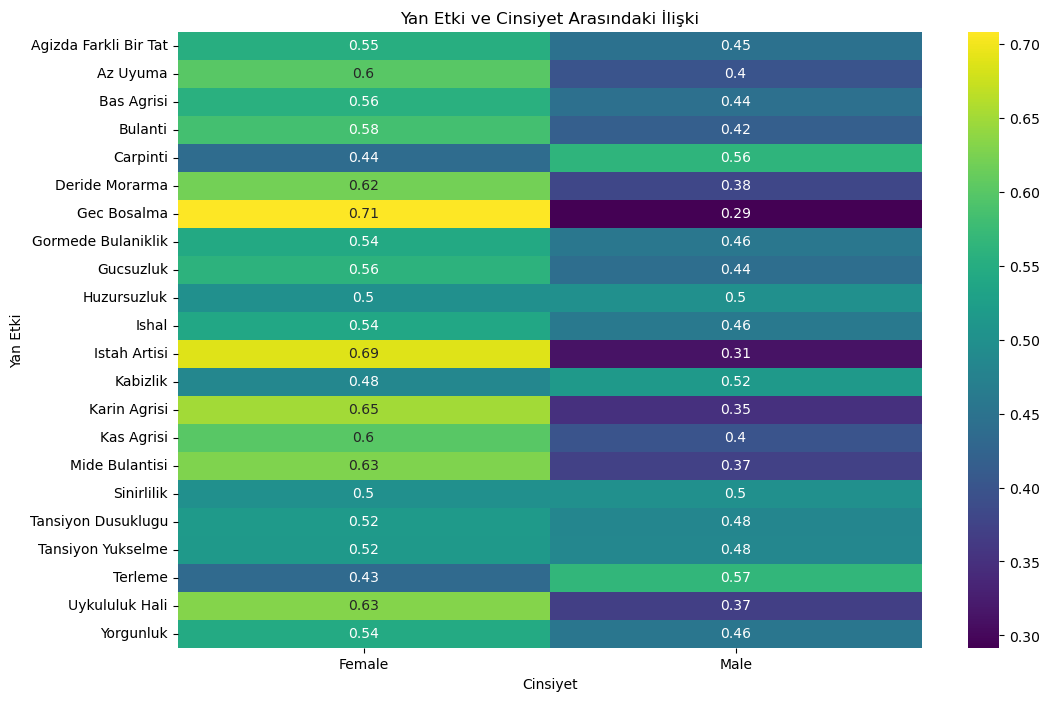

In [133]:
# Yan etki ve cinsiyet arasındaki ilişkiyi gösteren çapraz tabloyu oluşturma
crosstab = pd.crosstab(df['Yan_Etki'], df['Cinsiyet'], normalize='index')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap="viridis")

# Başlık ve etiketler
plt.title('Yan Etki ve Cinsiyet Arasındaki İlişki')
plt.xlabel('Cinsiyet')
plt.ylabel('Yan Etki')

# Grafiği göster
plt.show()

<Figure size 1500x1000 with 0 Axes>

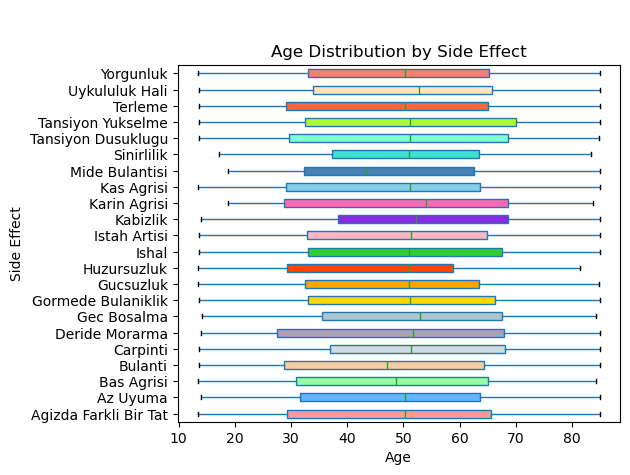

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Boxplot'u oluştur ve eksenleri bir değişkene ata
ax = df.boxplot(column='Age', by='Yan_Etki', grid=False, vert=False, patch_artist=True)

# Renk listesini tanımla
colors = [
    '#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#D9D9D9', 
    '#B39EB5', '#AEC6CF', '#FFD700', '#FFA500', '#FF4500', 
    '#32CD32', '#FFB6C1', '#8A2BE2', '#FF69B4', '#87CEEB', 
    '#4682B4', '#40E0D0', '#7FFFD4', '#ADFF2F', '#FF6347',
    '#FFE4C4', '#FA8072', '#D8BFD8', '#FFFACD', '#ADD8E6'
]

# Her kutuyu renklendir
for patch, color in zip(ax.patches, colors * len(df['Yan_Etki'].unique())):
    patch.set_facecolor(color)

# Grafik ayarları
plt.title('Age Distribution by Side Effect')
plt.suptitle(" ")
plt.xlabel('Age')
plt.ylabel('Side Effect')
plt.tight_layout()

plt.show()

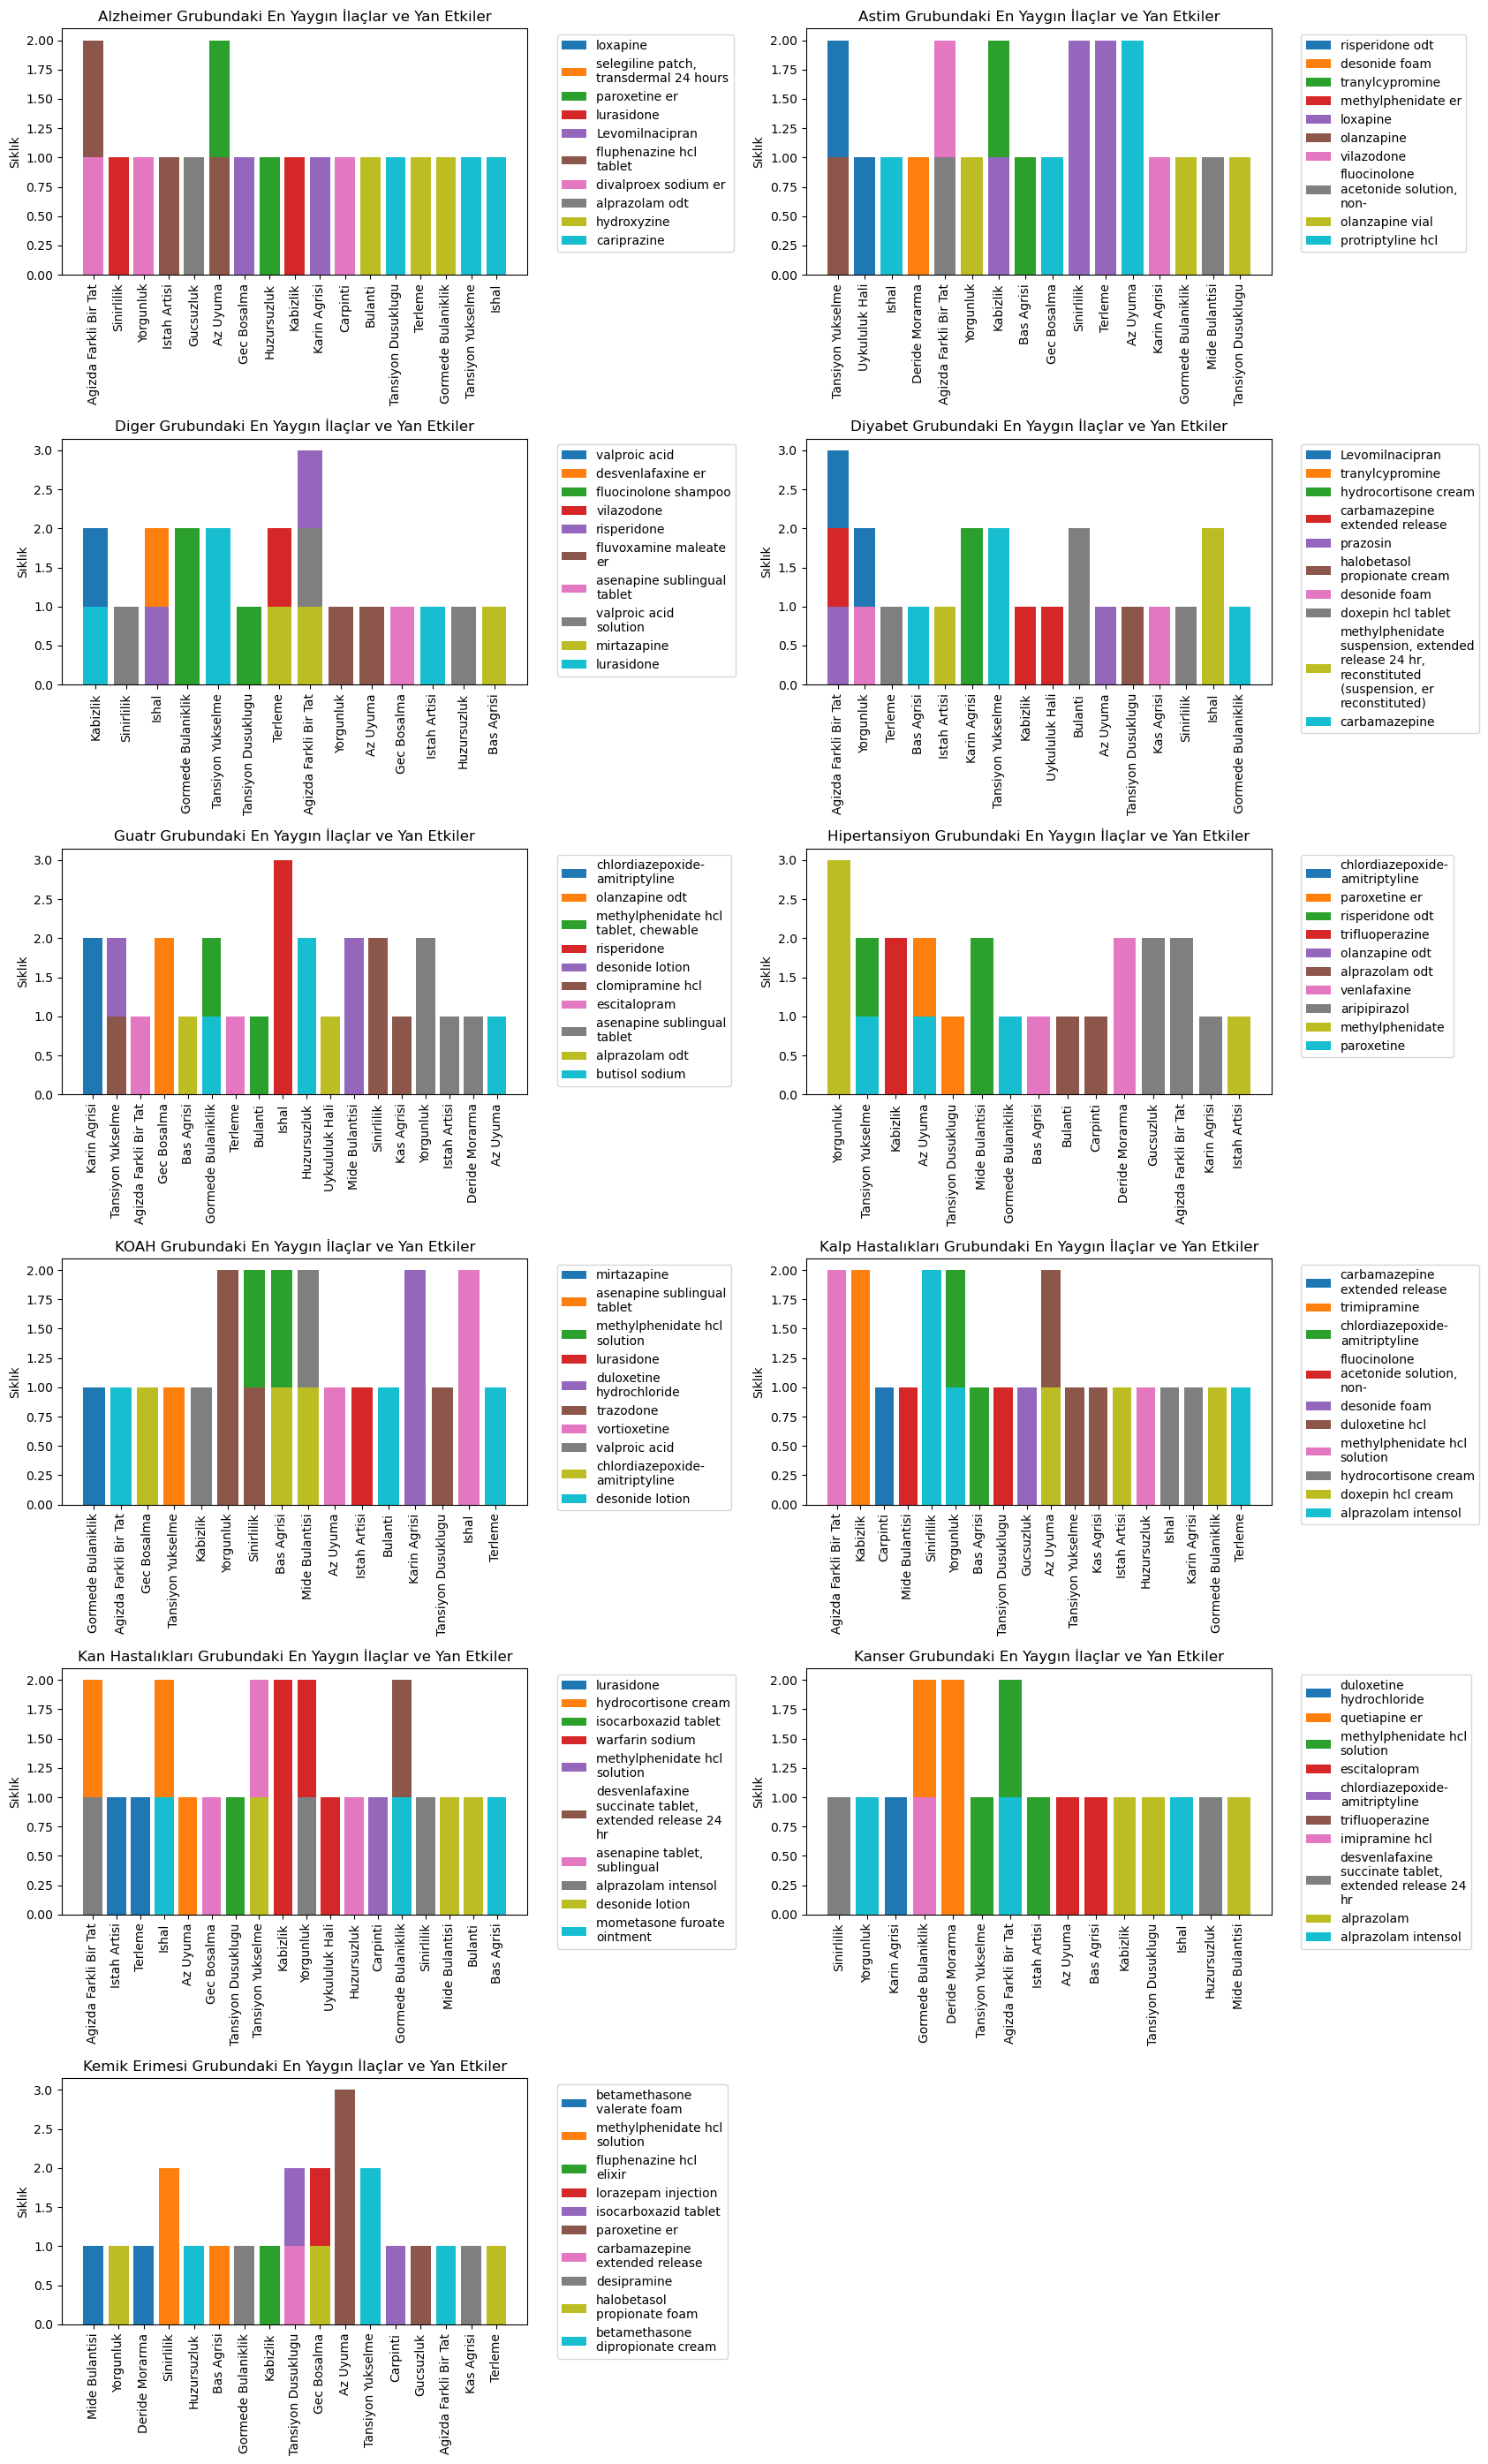

In [135]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 28))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_count = group['Ilac_Adi'].value_counts().nlargest(10)

    for ilac in ilac_count.index:
        ilac_yan_etki_count = group[group['Ilac_Adi'] == ilac]['Yan_Etki'].value_counts().nlargest(3)
        yan_etki_labels = ilac_yan_etki_count.index

        wrapped_label = "\n".join(textwrap.wrap(ilac, width=20))

        axes[i].bar(yan_etki_labels, ilac_yan_etki_count.values, label=wrapped_label)

    axes[i].set_title(f'{name} Grubundaki En Yaygın İlaçlar ve Yan Etkiler')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90)

    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

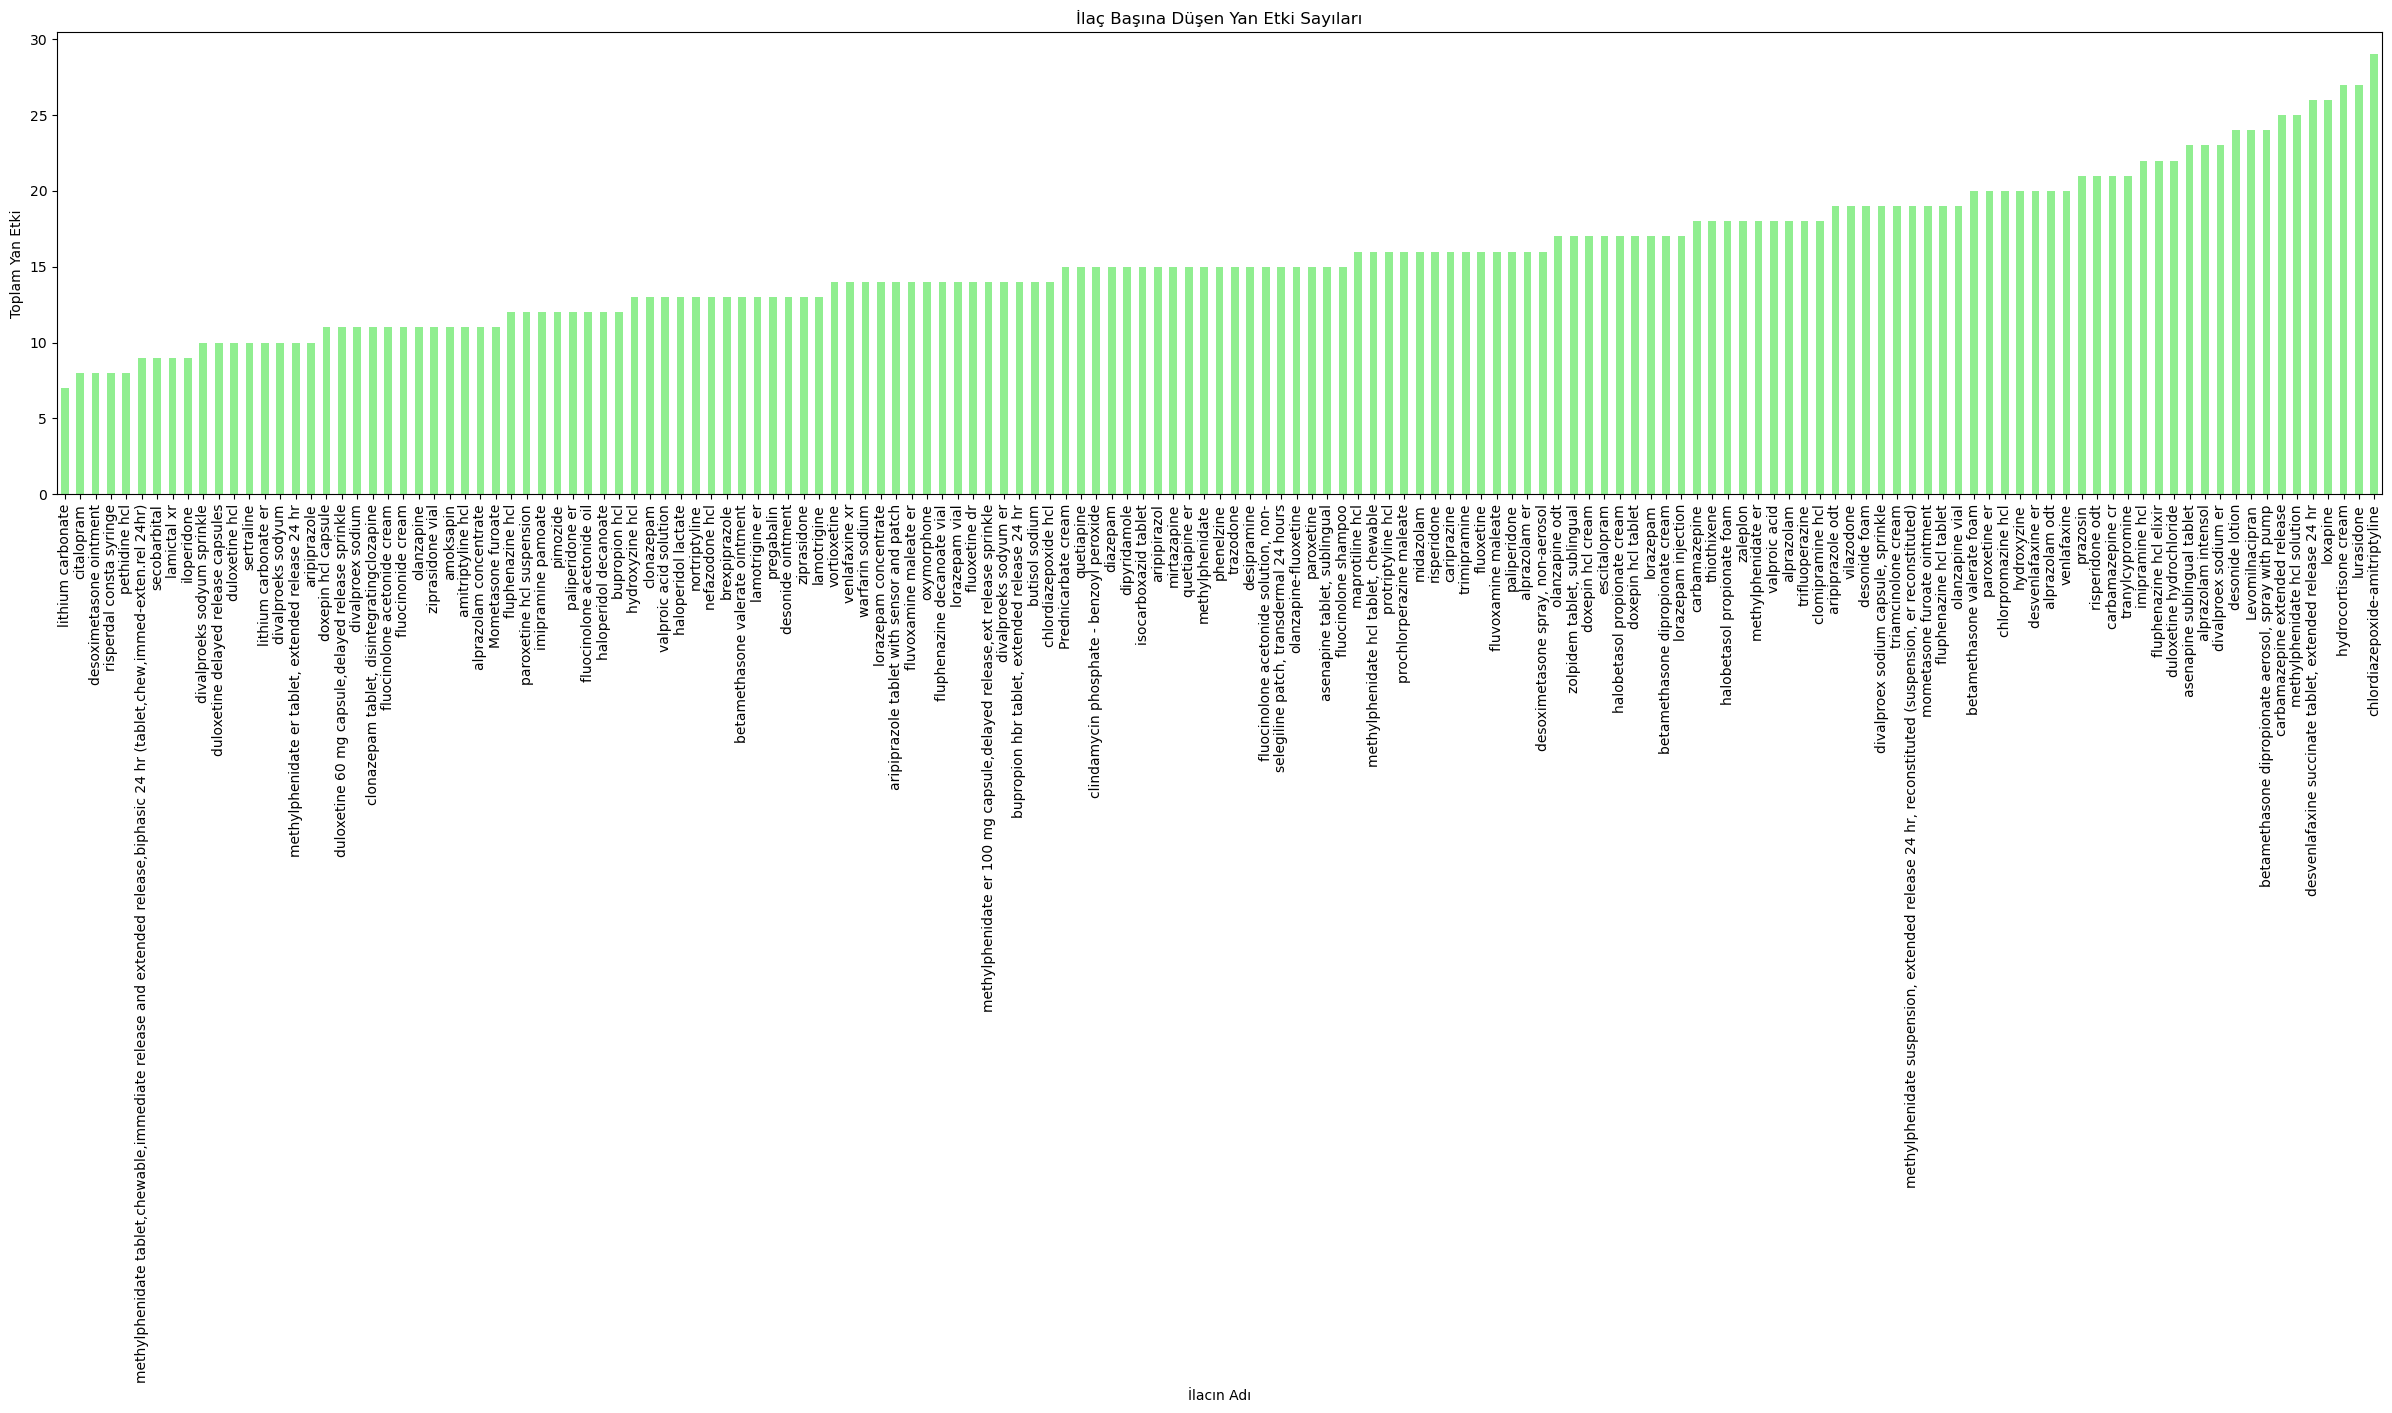

In [136]:
# Her ilaca ait bildirilen yan etki sayilari.
side_effect_per_drug=df.groupby('Ilac_Adi')['Yan_Etki'].count().sort_values(ascending=True)

plt.figure(figsize=(30,6))
side_effect_per_drug.plot(kind='bar',color='lightgreen')
plt.title('İlaç Başına Düşen Yan Etki Sayıları')
plt.xlabel('İlacın Adı')
plt.ylabel('Toplam Yan Etki')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

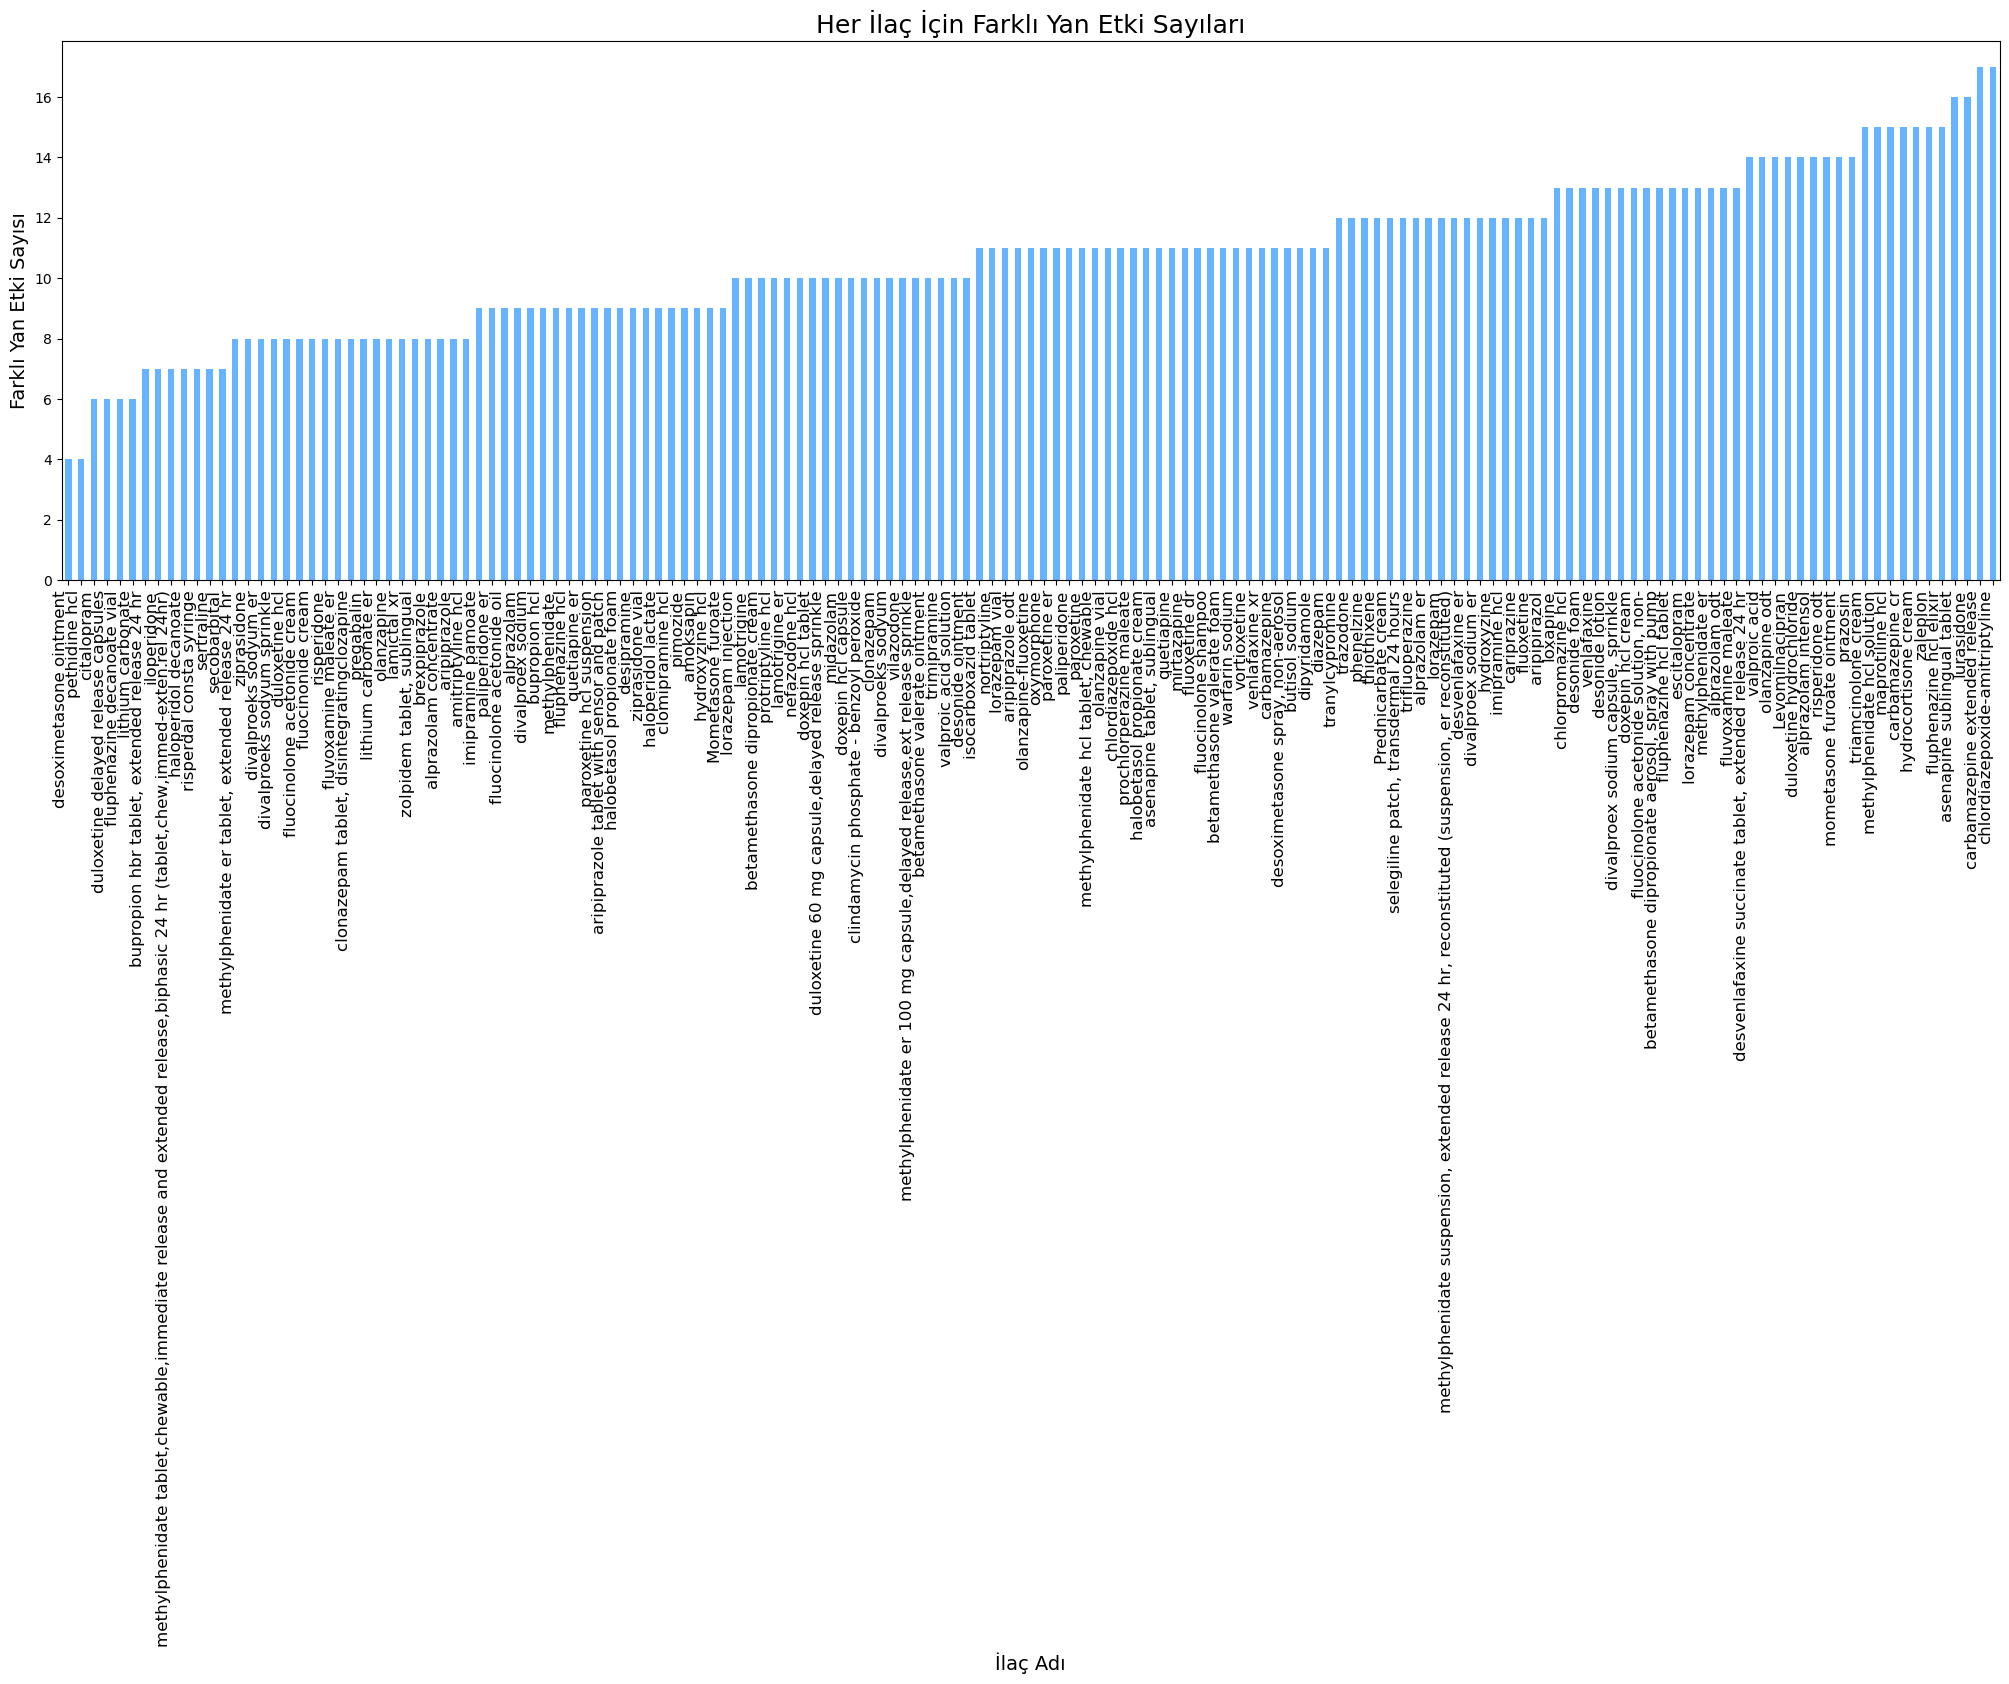

In [137]:
# İlaç başına sahip olunan farklı yan etki sayılarının hesaplanması
side_effect_counts_per_drug = df.groupby('Ilac_Adi')['Yan_Etki'].nunique().sort_values(ascending=True)

# Grafik oluşturma
plt.figure(figsize=(25,7))  # Grafik boyutun
side_effect_counts_per_drug.plot(kind='bar', color='#66B3FF') 

# Başlık ve etiketlerin özelleştirilmesi
plt.title('Her İlaç İçin Farklı Yan Etki Sayıları', fontsize=18)  # Başlık
plt.xlabel('İlaç Adı', fontsize=14)  # X ekseni etiketinin yazı boyutu
plt.ylabel('Farklı Yan Etki Sayısı', fontsize=14)  # Y ekseni etiketinin yazı boyutu

# X eksenindeki yazıların döndürülmesi ve boyutunun ayarlanması
plt.xticks(rotation=90, ha='right', fontsize=12) 

# Düzen ve aralık ayarları
plt.tight_layout()

# Grafik gösterimi
plt.show()


In [138]:
#Yan Etki kolonu ile Cinsiyet Kolonunun birbiri ile iliskisinin arastirilmasi.
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Yan_Etki'], df['Cinsiyet'])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_val:2f}")

Chi-Square Statistic: 24.93
P-Value: 0.250059


In [139]:
df['Ilac_Baslangic_Gun'] = (df['Ilac_Baslangic_Tarihi'] - df['Ilac_Baslangic_Tarihi'].min()).dt.days
df['Ilac_Bitis_Gun'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi'].min()).dt.days
df['Yan_Etki_Bildirim_Gun'] = (df['Yan_Etki_Bildirim_Tarihi'] - df['Ilac_Baslangic_Tarihi'].min()).dt.days

In [140]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

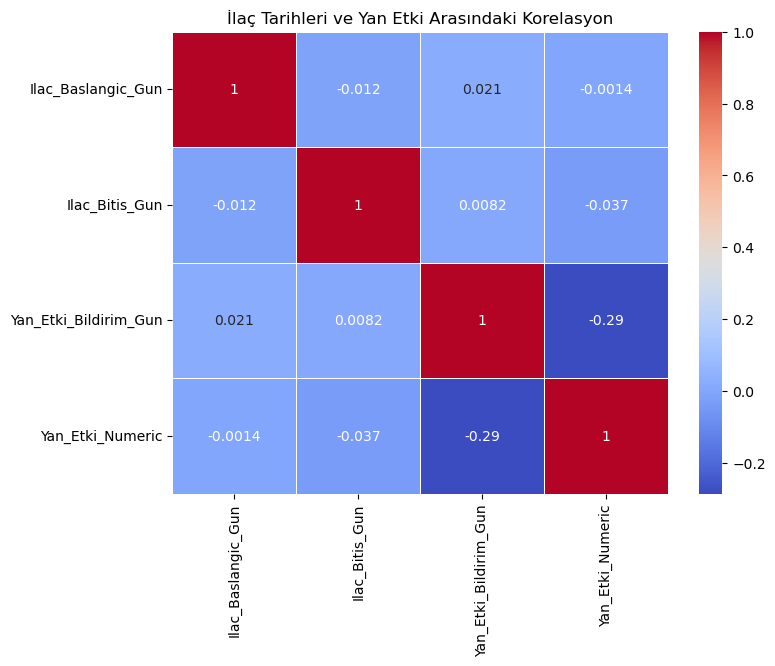

In [141]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Yan Etki sütununu sayısal değerlere çevirmek için Label Encoding işlemi
label_encoder = LabelEncoder()
df['Yan_Etki_Numeric'] = label_encoder.fit_transform(df['Yan_Etki'])  # Yan Etki encoded

# Korelasyon analizi için kullanılacak sütunlar
correlation_columns = ['Ilac_Baslangic_Gun', 'Ilac_Bitis_Gun', 'Yan_Etki_Bildirim_Gun', 'Yan_Etki_Numeric']

# Korelasyon matrisini oluştur
correlation_matrix = df[correlation_columns].corr()

# Geçici sütunları temizle
df.drop(columns=correlation_columns, inplace=True)

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('İlaç Tarihleri ve Yan Etki Arasındaki Korelasyon')
plt.show()


In [142]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik_Hastaliklarim                392
Baba_Kronik_Hastaliklari            156
Anne_Kronik_Hastaliklari            217
Kiz_Kardes_Kronik_Hastaliklari       97
Erkek_Kardes_Kronik_Hastaliklari    121
Kan_Grubu                           347
Kilo                                293
Boy                                 114
Age                                   0
dtype: int64

# Data Processing

In [143]:
#Modelin eğitimi üzerinde etkisi olmayacağını yukarıdaki ilişkilere dayanarak yorumladığım sütunların, modelin başarımını olumsuz etkilememesi için kaldırılması

df.drop(columns=['Dogum_Tarihi','Uyruk','Il','Kullanici_id','Ilac_Baslangic_Tarihi','Ilac_Bitis_Tarihi','Yan_Etki_Bildirim_Tarihi'],inplace=True)

In [144]:
df.head()

,Cinsiyet,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy,Age
0,Male,trifluoperazine,Kabizlik,Ceviz,"[Hipertansiyon, Kan Hastaliklari]","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64.561259
1,Male,fluphenazine hcl,Yorgunluk,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0,84.947296
2,Female,warfarin sodium,Carpinti,Muz,"[Kalp Hastaliklari, Diyabet]","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,47.764545
3,Male,valproic acid,Sinirlilik,Pancar,"[Diyabet, Diger]","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,47.266256
4,Female,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,"[Diyabet, Kalp Hastaliklari]","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48.052019


# Aykırı Değerlerin Bulunup Yok edilmesi

In [145]:
df.isnull().sum() # dataframe'deki bos deger iceren sutunlarin bulunmasi ve ne kadar bos deger icerdiklerinin bilgisi

Cinsiyet                            778
Ilac_Adi                              0
Yan_Etki                              0
Alerjilerim                         484
Kronik_Hastaliklarim                392
Baba_Kronik_Hastaliklari            156
Anne_Kronik_Hastaliklari            217
Kiz_Kardes_Kronik_Hastaliklari       97
Erkek_Kardes_Kronik_Hastaliklari    121
Kan_Grubu                           347
Kilo                                293
Boy                                 114
Age                                   0
dtype: int64

In [146]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Kategorik sütunları belirleme
categorical_columns = ['Cinsiyet', 'Alerjilerim', 'Kronik_Hastaliklarim', 
                       'Baba_Kronik_Hastaliklari', 'Anne_Kronik_Hastaliklari', 
                       'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek_Kardes_Kronik_Hastaliklari', 
                       'Kan_Grubu', 'Ilac_Adi', 'Yan_Etki']

# Kategorik veriler için LabelEncoder uygulama
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Kategorik verileri sayısallaştırma
    label_encoders[col] = le  # LabelEncoder'ları saklama

# Sayısal sütunlardaki eksik verileri ortalama ile doldurma
df['Kilo'] = df['Kilo'].fillna(df['Kilo'].mean())
df['Boy'] = df['Boy'].fillna(df['Boy'].mean())

# KNNImputer ile eksik verileri doldurma
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Geri dönüştürülen kategorik sütunlar
for col in categorical_columns:
    df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))


In [149]:
df.isnull().sum()

Cinsiyet                            0
Ilac_Adi                            0
Yan_Etki                            0
Alerjilerim                         0
Kronik_Hastaliklarim                0
Baba_Kronik_Hastaliklari            0
Anne_Kronik_Hastaliklari            0
Kiz_Kardes_Kronik_Hastaliklari      0
Erkek_Kardes_Kronik_Hastaliklari    0
Kan_Grubu                           0
Kilo                                0
Boy                                 0
Age                                 0
dtype: int64

In [150]:
df_imputed.head()

,Cinsiyet,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy,Age
0,Male,trifluoperazine,Kabizlik,Ceviz,"['Hipertansiyon', ' Kan Hastaliklari']","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.000000,191.0,64.561259
1,Male,fluphenazine hcl,Yorgunluk,Toz,nan,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",nan,81.000000,181.0,84.947296
2,Female,warfarin sodium,Carpinti,Muz,"['Kalp Hastaliklari', ' Diyabet']","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.000000,158.0,47.764545
3,Male,valproic acid,Sinirlilik,Pancar,"['Diyabet', ' Diger']","Kalp Hastaliklari, Diger",nan,Astim,"Kalp Hastaliklari, Kanser",AB RH-,80.863857,165.0,47.266256
4,Female,carbamazepine extended release,Agizda Farkli Bir Tat,nan,"['Diyabet', ' Kalp Hastaliklari']","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.000000,172.0,48.052019


# Encoding

In [151]:
#Modelin veriyi anlayabilmesi icin kategorik veriler uzerine one-hot-encoding uygulanmasi

df_one_hot_encoded = pd.get_dummies(df_imputed, columns=categorical_columns, drop_first=True)
df_one_hot_encoded=df_one_hot_encoded.astype(int)

In [152]:
df_one_hot_encoded.head()

,Kilo,Boy,Age,Cinsiyet_Male,Cinsiyet_nan,Alerjilerim_Balik,Alerjilerim_Bugday,Alerjilerim_Ceviz,Alerjilerim_Cikolata,Alerjilerim_Deniz Urunler,...,Yan_Etki_Kabizlik,Yan_Etki_Karin Agrisi,Yan_Etki_Kas Agrisi,Yan_Etki_Mide Bulantisi,Yan_Etki_Sinirlilik,Yan_Etki_Tansiyon Dusuklugu,Yan_Etki_Tansiyon Yukselme,Yan_Etki_Terleme,Yan_Etki_Uykululuk Hali,Yan_Etki_Yorgunluk
0,103,191,64,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,81,181,84,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,93,158,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80,165,47,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,99,172,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df_one_hot_encoded.isnull().sum()

Kilo                           0
Boy                            0
Age                            0
Cinsiyet_Male                  0
Cinsiyet_nan                   0
                              ..
Yan_Etki_Tansiyon Dusuklugu    0
Yan_Etki_Tansiyon Yukselme     0
Yan_Etki_Terleme               0
Yan_Etki_Uykululuk Hali        0
Yan_Etki_Yorgunluk             0
Length: 643, dtype: int64

# Normalization

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
#Modelin egitiminin daha kisa surmesi ve bellek kullaniminin azaltilmasi icin normalizasyon isleminin uygulanmasi
columns_to_normalize=['Age','Kilo','Boy']
scaler=MinMaxScaler()
df_one_hot_encoded[columns_to_normalize]=scaler.fit_transform(df_one_hot_encoded[columns_to_normalize])

In [156]:
df_one_hot_encoded.head()

,Kilo,Boy,Age,Cinsiyet_Male,Cinsiyet_nan,Alerjilerim_Balik,Alerjilerim_Bugday,Alerjilerim_Ceviz,Alerjilerim_Cikolata,Alerjilerim_Deniz Urunler,...,Yan_Etki_Kabizlik,Yan_Etki_Karin Agrisi,Yan_Etki_Kas Agrisi,Yan_Etki_Mide Bulantisi,Yan_Etki_Sinirlilik,Yan_Etki_Tansiyon Dusuklugu,Yan_Etki_Tansiyon Yukselme,Yan_Etki_Terleme,Yan_Etki_Uykululuk Hali,Yan_Etki_Yorgunluk
0,0.883333,0.793103,0.718310,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.516667,0.620690,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.716667,0.224138,0.478873,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.500000,0.344828,0.478873,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.816667,0.465517,0.492958,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Sayısal ve kategorik sütunları ayırın
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Sayısal dönüşümler için pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Kategorik dönüşümler için pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Tüm dönüşümleri birleştirin
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Tam pipeline'ı oluşturun
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Veriyi dönüştürün
df_preprocessed = full_pipeline.fit_transform(df)

# Sonuçları DataFrame'e çevirin (One-Hot Encoding sonrası sütun isimleri değişebilir)
df_preprocessed = pd.DataFrame(df_preprocessed, columns=full_pipeline.named_steps['preprocessor'].get_feature_names_out())


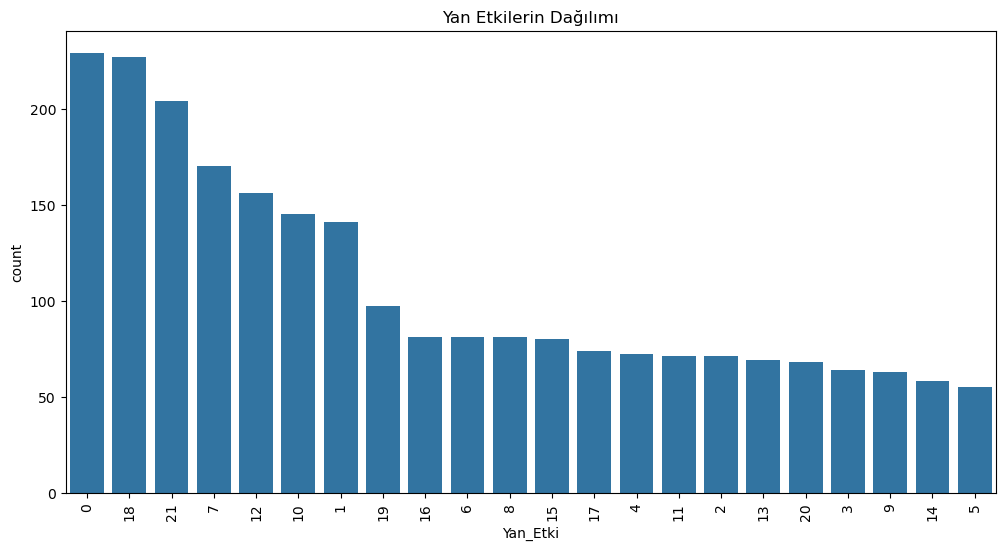

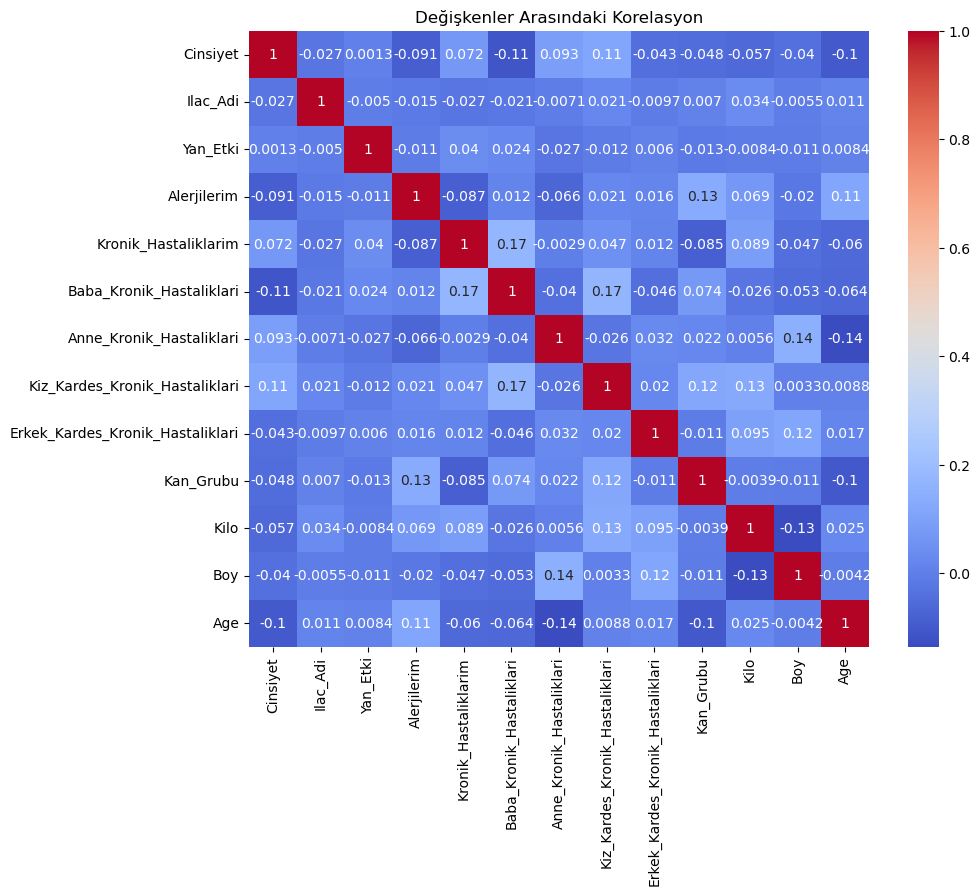

In [159]:
# Yan Etkilerin Dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Yan_Etki', order=df['Yan_Etki'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Yan Etkilerin Dağılımı')
plt.show()

# İlişkili Yan Etkiler
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Değişkenler Arasındaki Korelasyon')
plt.show()